# Midterm T2 2016

The midterm consists of two parts: 

 - **Easy Zone** which worth 100 point each which most of them you can just copy from exercise/homework
 - **Creative zone** which worth 125 points each.
 - The score for each sub question is equal unless indicated.
 - Comment your code!! If it takes me more than 5 minutes to figure out what your code does, I won't grade it.

The total score is 850 but you will be graded out of 0.9*850=765.


In [1]:
score = 100 + 60 + 100 + 100 + 100 + 100 + 125 + 125
print score, score/765.

810 1.05882352941


In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

$$Chananyu Pumpradub (Mind) 5680963$$

## Easy Zone (100 Each)

### 1 Taylor Series
<span style="color:red"> 100 </span>

1) Find the first 3 *non-zero* terms in Taylor series of
$$f(x) = sin(2x)$$

$$f(x) = 2x  - \frac{8x^3}{3!} + \frac{32x^5}{5!} $$

2) Use the Taylor series you found in 1) to find $$sin(0.2)$$ **along with bound on error**.

In [4]:
def f(x):
    return 2.*x - 4./3.*x**3. + 4./15.*x**5

print "ANS: ", f(0.1)




ANS:  0.198669333333


In [5]:
def calError(x,f,e):
    c_e = f*np.abs((x**(e+1))/math.factorial(e+1))
    return c_e

err= calError(0.1,64.*math.sin(0.1*2),5)
print "error:",err,"upper bound:",err+f(0.1),"lower bound:",f(0.1)-err



error: 1.76594960707e-08 upper bound: 0.198669350993 lower bound: 0.198669315674


error term $ f^{(6)}(\xi) =  64sin(2x)$ 

## 2) Bisection

<span style="color:red"> 60 </span>

We know that 

$$\sin\left(\frac{\pi}{4}\right) = \cos\left(\frac{\pi}{4}\right)$$

This means that we can find the value of $\pi$ by finding the solution of

$$\sin(x) = \cos(x)$$

Then multiply the solution by 4. Then we get the value of $\pi$.

1) Since we multiply solution by 4 at the end. This means that if we want the value of $\pi$ that is accurate at least $10^{-6}$ we need to make sure that our method of finding the solution to $\sin(x) = \cos(x)$ is accurate at least $\displaystyle \frac{10^{-6}}{4}$.

If our initial range is from $x=[0,2]$ and the method we use is bisection, how many iterations do we need to make sure that the solution is at most $\displaystyle\frac{10^{-6}}{4}$ from the real answer.

In [6]:
def f(x):
    return np.sin(x)-np.cos(x)
def check_sign(yo,yt):
    return f(yo) * f(yt) < 0

def pass_error(x,limit):
    return np.abs(f(x)) < limit #<< no that's not how we test error bound.
#it's the error bound on x. NOT y.

def find_x(x0,x1,limit,t):
    x = (x0+x1)/2
    t += 1
#     print f(x),t
    if(pass_error(x,limit)):
        return x,t
    else:
        if(check_sign(x,x0)):
            return find_x(x0,x,limit,t)
        else:
            return find_x(x,x1,limit,t)

ans,itera= find_x(0,2.,1e-6/4.0,0)
print "total iteration =",itera

total iteration = 22


2) Find the value of $\pi$ that is accurate at least $10^{-6}$ using the method above.

In [7]:
print "answer pi =",4*ans

answer pi = 3.14159202576


### 3 Newton's Method

<span style="color:red"> 100 </span>

1) (40) In the homework we found that we can find $\sqrt{x}$ using 

$$x_{n+1}  = \frac{\displaystyle x_{n} + \frac{2}{x_n}}{2}$$

Derive an analogous relation for finding $\sqrt[5]{x}$

Let $f(x) = x^5 - a = 0$ where $x = \sqrt[5]a$

Newton's method: 

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} \\
x_{n+1} = x_n - \frac{x_n^5 - a}{5x_n^4} \\
x_{n+1} = \frac{5x_n}{5} - \frac{x_n - \frac{a}{x_n^4}}{5} \\
x_{n+1} = \frac{5x_n - x_n + \frac{a}{x_n^4}}{5} \\
x_{n+1} = \frac{4x_n + \frac{a}{x_n^4}}{5} 
$$

2) (40) Find $\sqrt[5]{31}$ to a decent accuracy using what you found above

In [8]:
def nextroot(x,a):
    return (4*x+a/(x**4))/5.
def findroot(x,a,n):
    for i in range(n):
        c_val = nextroot(x,a)
        x = c_val
    return x

x = 7

print "My Method:",findroot(x,31,10),"Real Answer:",31**(1/5.)

My Method: 1.98734075466 Real Answer: 1.98734075466


3) (20) Newtons's Method vs Bisection method.

3.1) Which one converge faster?

3.2) Why should we bother using slower one?

ANSWER:::::::

3.1)Newton's Method converge faster (Quadratic convergence)

3.2)Newton's method doesn't guarantee solution, bisection we can give the section where the answer is. 

### 4 Legendre

<span style="color:red"> 100 </span>

1)If we use Legendre method to find polynomail which passes through all thsese points. What would be the degree of the polynomial? (20)

(-2, 2)

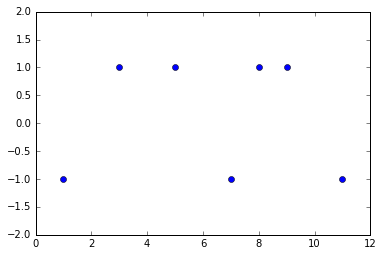

In [9]:
xs = [1,3,5,7,8,9,11]
ys = [-1,1,1,-1,1,1,-1]
plt.plot(xs,ys,'o')
plt.ylim(-2,2)


degree 6

2) Use Legendre method and plot polynomial which passes through all the points given. (80)

(-3, 3)

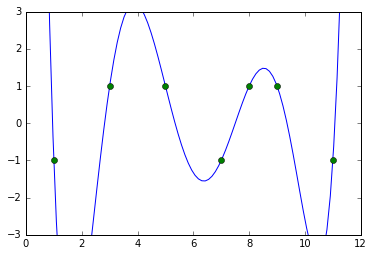

In [10]:
xs = [1,3,5,7,8,9,11]
ys = [-1,1,1,-1,1,1,-1]
def legendre(x,l,yl):
    ans = 0
    for i in range(len(l)):
        numerator = 1
        denominator = 1
        for j in range(len(l)):
            if j != i:
                numerator = numerator * (x-l[j])
                denominator = denominator * (l[i]-l[j])
        ans+= yl[i]*numerator/float(denominator)
    return ans

xxs = np.linspace(0,12,100)
plt.plot(xxs,[legendre(x,xs,ys) for x in xxs])
plt.plot(xs,ys,'o')
plt.ylim(-3,3)


### 5 Integration

<span style="color:red"> 100 </span>

1) We want to calculate

$$\int_3^7 \sqrt{x} \; dx$$

using trapezoid rule such that the answer is at most $10^{-5}$ away from the real answer how many pieces do we need?

In [10]:
def ddf(x):
    return -1./(4*x**(3./2.))

def cheati(x):
    return 2.*x**(3./2.)/3.
def error(a,b,n,xi):
    return (b-a)**3/(12.*n**2) * ddf(xi)

def findSol(a,b,n,xi):
    err = error(a,b,n,xi)
    print(err)
    while(np.abs(err)>1e-5):
        n+=1
        err = error(a,b,n,xi)
    return n

term= findSol(3.,7.,1.,3.)

print ("TERM:",term,)
print(ddf(7.))

-0.25660011963983365
0.06415002990995841
0.028511124404425964
0.016037507477489603
0.010264004785593348
0.007127781101106491
0.00523673713550681
0.004009376869372401
0.0031679027116028853
TERM: 161.0
-0.01349873117890097


2) Use trapezoid rule to calculate
$$\int_3^7 \sqrt{x} \; dx$$
such that your answer is at most $10^{-5}$ from the real answer.


In [12]:
def f(x):
    return x**(1./2.)

def calculate(x0,xf,n):
    h = (xf-x0)/n
    ans = f(x0)/2. + f(xf)/2.
    

    for i in range(1,n):
        ans+=f(x0+h*i)
    
    ans = h*ans
    return ans

myx =  calculate(3.,7.,161)

print "AREA =",myx


AREA = 8.88273270847


### 6 Derivative

<span style="color:red"> 100 </span>

1) Find the lowest point in the of function `math.lgamma` in the range of [1,2]. (Give me both x and y) 

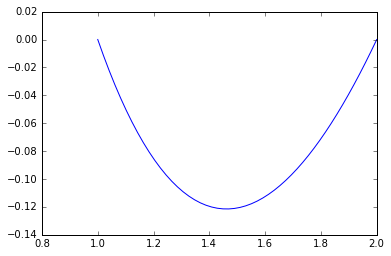

In [13]:
def f(x):
    return math.lgamma(x)

def df(x,h):
    return (f(x+h)-f(x-h))/(2*h)

xs = np.linspace(1,2)
plt.plot(xs,[f(x) for x in xs])


In [14]:

def check_sign(yo,yt):
    return df(yo,0.01) * df(yt,0.01) < 0

def pass_error(x,limit):
    return math.fabs(df(x,0.01)) < limit

def find_x(x0,x1,limit):
    x = (x0+x1)/2
#     print f(x),t
    if(pass_error(x,limit)):
        return x
    else:
        if(check_sign(x,x0)):
            return find_x(x0,x,limit)
        else:
            return find_x(x,x1,limit)

ans= find_x(1,2.,1e-6)
print "Lowest (x,y): ",(ans,f(ans)),"Slope at that point:",df(ans,0.01)


Lowest (x,y):  (1.4616470336914062, -0.1214862904285966) Slope at that point: -3.51409451538e-07


2) Show that 
$$\frac{9f(x+h)-f(x+3h)-8f(x)}{6h} = f'(x) + O(h^2)$$

$$9f(x+h) = 9[f(x)+f'(x)h+\frac{f''(x)h^2}{2!}+\frac{f'''(\xi')h^3}{3!}]$$
$$9f(x+h) = 9f(x)+9f'(x)h+\frac{9f''(x)h^2}{2!}+\frac{9f'''(\xi')h^3}{3!}$$

$$-f(x+3h) = -[f(x)+f'(x)3h+\frac{9f''(x)h^2}{2!}+\frac{27f'''(\xi')h^3}{3!}]$$
$$-f(x+3h) = -f(x)-f'(x)3h-\frac{9f''(x)h^2}{2!}-\frac{27f'''(\xi')h^3}{3!}$$

$$\frac{9f(x+h)-f(x+3h)-8f(x)}{6h} = \frac{9f(x)+9f'(x)h+\frac{9f''(x)h^2}{2!}+\frac{9f'''(\xi')h^3}{3!}-f(x)-f'(x)3h-\frac{9f''(x)h^2}{2!}-\frac{27f'''(\xi')h^3}{3!} - 8f(x)}{6h} $$

$$\frac{9f(x+h)-f(x+3h)-8f(x)}{6h} = \frac{6f'(x)h+\frac{9f'''(\xi')h^3}{3!}-\frac{27f'''(\xi')h^3}{3!}}{6h} $$

$$\frac{9f(x+h)-f(x+3h)-8f(x)}{6h} = f'(x)+\frac{9f'''(\xi')h^2}{6*3!}-\frac{27f'''(\xi')h^2}{6*3!} $$

$$\frac{9f(x+h)-f(x+3h)-8f(x)}{6h} = f'(x)+ O(h^2) $$


## Creative Zone (125 Each)

The questions may look ridiculous. ** Do not panic **. It is much easier than it looks.

### 7 Confidence Interval

##### Intro


In the homework you have calculated full width half max which is a measure of how spread out a distribution is there is another measure which has a better statistical intepretation and is widely used called 95% confidence interval.

All the statistical interpretations aside(which you will learn in AJ Ko's class), the 95% interval is defined to be an interval symmetric around the most probable(highest value) $\bar{x}$, 
$$[\bar{x} - \alpha, \bar{x} + \alpha]$$ such that the **area under the distribution in this interval is 95% of the total area**. Note that the range is symmetric around the most probable(highest value) $\bar{x}$.

The concept is illustrated in the figure below that the 95% confidence interval of the distribution shown below is approximately [-1.2,1.6] since the highest point is at 0.2 and the area of interval [0.2-1.4, 0.2+1.4] = [-1.2, 1.6] is about 95% of the total area.

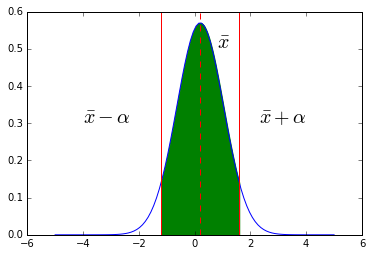

In [15]:
def gaussian(x):
    sigma = 0.7
    mu = 0.2
    return 1/math.sqrt(2*math.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma))

xs = np.linspace(-5,5,100)
ys = gaussian(xs)

xs2 = np.linspace(-1.2,1.6,100)
ys2 = gaussian(xs2)



plt.plot(xs, ys)
plt.fill_between(xs2, 0, ys2,color='green')
plt.axvline(1.6,color='r')
plt.axvline(-1.2,color='r')
plt.axvline(0.2,color='r',ls='dashed')
plt.text(-4,0.3, r'$\bar{x}-\alpha$',size=20)
plt.text(2.3, 0.3, r'$\bar{x}+\alpha$',size=20)
plt.text(0.8, 0.5,r'$\bar{x}$', size=20)


##### Your task

For this problem your task is to find 95% confidence interval for the following distribution.
$$f(x) = \frac{1}{\pi\gamma} \frac{1}{(x-\mu)^2+\gamma^2}$$
with $\mu = 1.$ and $\gamma = 2.$. Your answer should be a range. (Do it for a reasonable accuracy. If you have done the homework, you know what I mean)

You may assume that the total area from $x=-\infty, \infty$ of this distribution is 1. (It actually is 1.)

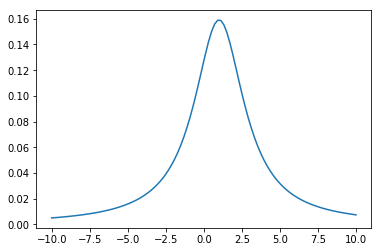

In [15]:
def cauchy(x):
    mu = 1.
    gamma = 2.
    return 1./(math.pi*gamma)*(gamma**2/((x-mu)**2+gamma**2))

xs = np.linspace(-10,10, 100)
ys = cauchy(xs)
plt.plot(xs, ys)

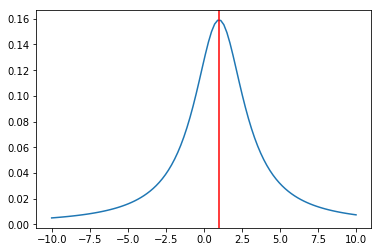

In [16]:
def df(x,h):
    return (cauchy(x+h)-cauchy(x-h))/(2*h)

def check_sign(yo,yt):
    return df(yo,0.01) * df(yt,0.01) < 0

def pass_error(x,limit):
    return math.fabs(df(x,0.01)) < limit

def find_x(x0,x1,limit):
    x = (x0+x1)/2
#     print f(x),t
    if(pass_error(x,limit)):
        return x
    else:
        if(check_sign(x,x0)):
            return find_x(x0,x,limit)
        else:
            return find_x(x,x1,limit)

maxx= find_x(0,3.,1e-6)
xs = np.linspace(-10,10, 100)
ys = cauchy(xs)
plt.plot(xs, ys)
plt.axvline(maxx,color='r')

1.0000076293945312
Alpha= 25.414087078017573 [x-alpha,x+alpha] [-24.414079448623042, 26.414094707412104]


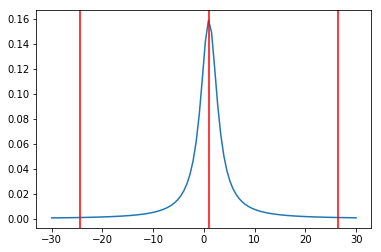

In [25]:
def calculate(x0,xf,n):
    h = (xf-x0)/n
    ans = cauchy(x0)/2. + cauchy(xf)/2.
    
    for i in range(1,n):
        ans+=cauchy(x0+h*i)
    
    ans = h*ans
    return ans

def findSol(s,f,x,n,b):
    cf = f
    ans = calculate(x-s,x+s,n)
    while np.abs(ans-b) > 1e-6: 

        if ans > b:
            s = (s+cf)/2.            
        else:
            os = s

            s = f-(s+cf)/2.
            cf = os
        ans = calculate(x-s,x+s,n)
    return s,ans

alp,area = findSol(0.,100.,maxx,100,0.95)
print ("Alpha=",alp,"[x-alpha,x+alpha]",[maxx-alp,maxx+alp])
xs = np.linspace(-30,30, 100)
ys = cauchy(xs)
plt.plot(xs, ys)
plt.axvline(maxx,color='r')
plt.axvline(maxx-alp,color='r')
plt.axvline(maxx+alp,color='r')



### 8 Sum of $i^k$

<span style="color:red"> 100 </span>


#### Intro

In discrete math we learn that the sum of integer from $1 \ldots n$ is given by
$$\sum_{i=1}^n i = \frac{n(n-1)}{2} = \frac{n^2}{2} - \frac{n}{2}$$
and
$$\sum_{i=1}^n i^2 = \frac{n^3}{3}+\frac{n^2}{2}+\frac{n}{6}$$
and
$$\sum_{i=1}^n i^3 = \left( \frac{n(n-1)}{2} \right)^2 = \frac{n^4}{4} + \ldots$$

As you may notice, one can actually show that $\displaystyle \sum_{i=1}^n i^k$ has is a polynomial of degree $k+1$.

To calculate the sum if we use for loop and calculate the left hand side it will be $O(n)$. But if we use the right hand side we can calculate it in $O(1)$. So, calculating it with a closed form is a much better approach.

But as you recall getting the close formed formula is quite difficult to do by hands. In this problem we will use legendre method to find it.

#### Problem

In this problem we want to calculate 
$$\sum_{i=1}^n i^7$$
We expect this to have a closed form of polynomial of degree 8.

Use what you learn about Legendre Method and write a function that takes in $n$ and calculate $$\sum_{i=1}^n i^7$$ in O(1). (Any other methods will not be accepted)

##### Warning: don't try to sum up too far as it can cause integer overflow.

241561425.0

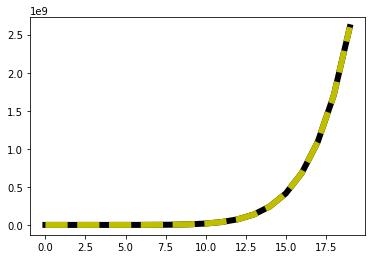

In [35]:
def f(x): #<< why not comprehension
    s = 0
    for i in range(x):
        s+= (i+1)**7
    return s
xs = [1,2,3,4,5,6,7,8,9]
ys = [f(x) for x in xs]
# nxs = range(11)
def legendre(x,l,yl):
    ans = 0
    for i in range(len(l)):
        numerator = 1
        denominator = 1
        for j in range(len(l)):
            if j != i:
                numerator = numerator * (x-l[j])
                denominator = denominator * (l[i]-l[j])
        ans+= yl[i]*numerator/float(denominator)
    return ans

def findSeven(n):
    return legendre(n,xs,ys)

# plt.plot(xs,ys)
plt.plot(range(20),[findSeven(x) for x in range(20)],lw=6,color='k')

plt.plot(range(20),[f(x) for x in range(20)],lw=6,ls="--",color='y')

findSeven(14)